In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pathlib
from tensorflow.keras import layers, Model


In [37]:
#Datasets is used from same kaggle dataset as mentioned in class tutorial
#Data link: https://www.kaggle.com/datasets/fanconic/skin-cancer-malignant-vs-benign/code
train_path ='/Users/dipikaranabhat/Documents/CV/skin_cancer/archive/train'

val_path = '/Users/dipikaranabhat/Documents/CV/skin_cancer/archive/test'


In [39]:
# Define the image size and batch size
img_height, img_width = 224, 224
batch_size = 16

In [41]:
# Create the training and validation datasets
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2637 files belonging to 2 classes.


In [43]:
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    val_path,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 660 files belonging to 2 classes.


2024-11-10 21:28:35.131912: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


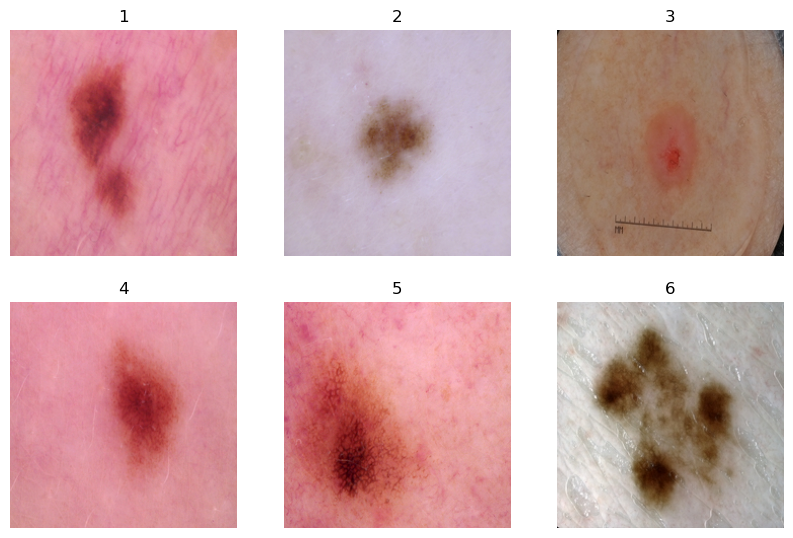

In [45]:
# Plot some sample images from the dataset
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(i+1)
        plt.axis("off")

In [15]:
# Create the ResNet50 model and set initial layers to be non-trainable
resnet_model = Sequential()
pretrained_model = tf.keras.applications.ResNet50(include_top=False,
                                                  input_shape=(img_height, img_width, 3),
                                                  weights='imagenet')

# Freeze the layers of the pretrained model
pretrained_model.trainable = False

# Add the pretrained ResNet50 model to the new model
resnet_model.add(pretrained_model)

# Add custom fully connected layers for binary classification
resnet_model.add(layers.Flatten())  # Flatten the output of the convolutional layers
resnet_model.add(layers.Dense(512, activation='relu'))  # Fully connected layer
resnet_model.add(layers.Dropout(0.25))  # Dropout to reduce overfitting
resnet_model.add(layers.Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
resnet_model.compile(optimizer=Adam(learning_rate=0.00005),
                     loss='binary_crossentropy',  # Binary crossentropy for binary classification
                     metrics=['accuracy'])

# Display the model summary
resnet_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,968,961 (285.98 MB)

 Trainable params: 51,381,249 (196.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [17]:
#Train the model
history = resnet_model.fit(train_dataset, validation_data=validation_dataset, epochs=12)

Epoch 1/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 65s 761ms/step - accuracy: 0.7376 - loss: 1.2685 - val_accuracy: 0.8606 - val_loss: 0.2971
Epoch 2/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 63s 766ms/step - accuracy: 0.9270 - loss: 0.1797 - val_accuracy: 0.8652 - val_loss: 0.2799
Epoch 3/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 67s 806ms/step - accuracy: 0.9606 - loss: 0.1041 - val_accuracy: 0.8682 - val_loss: 0.3568
Epoch 4/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 64s 773ms/step - accuracy: 0.9753 - loss: 0.0624 - val_accuracy: 0.8727 - val_loss: 0.3264
Epoch 5/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 64s 776ms/step - accuracy: 0.9880 - loss: 0.0353 - val_accuracy: 0.8621 - val_loss: 0.3804
Epoch 6/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 64s 772ms/step - accuracy: 0.9960 - loss: 0.0206 - val_accuracy: 0.8773 - val_loss: 0.3708
Epoch 7/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 64s 774ms/step - accuracy: 0.9966 - loss: 0.0183 - val_accuracy: 0.8788 - val_loss: 0.4111
Epoch 8/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 64s 773ms/step - accuracy: 0.9974 - loss: 0.0127 - val_accu

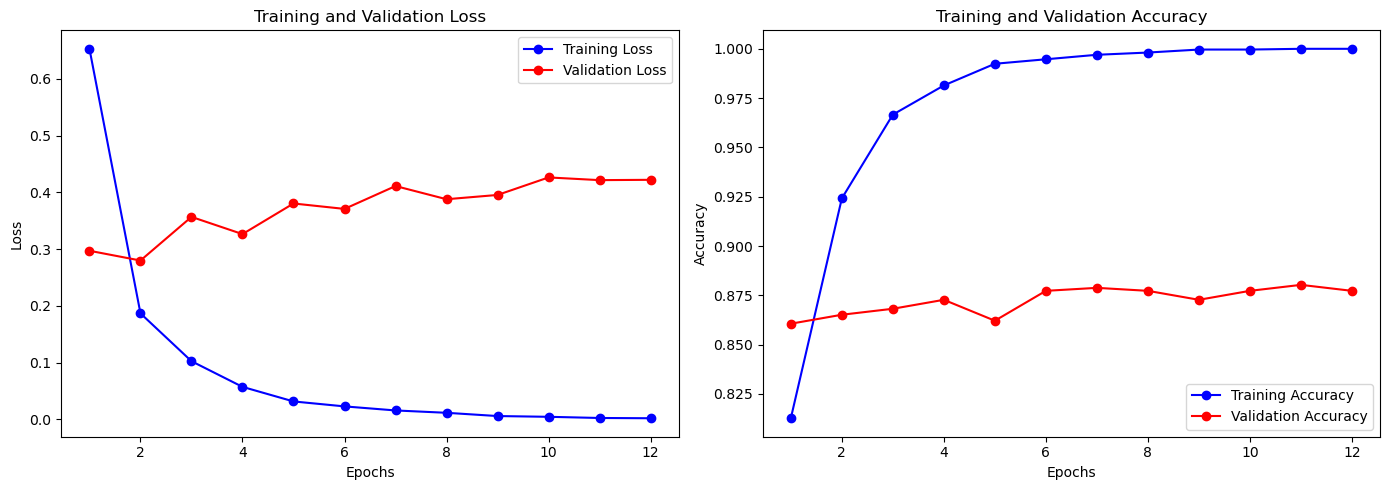

In [21]:
import matplotlib.pyplot as plt

# Extract loss and accuracy data from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)  # Epoch numbers

# Plotting Loss Curves
plt.figure(figsize=(14, 5))

# Subplot 1: Training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Subplot 2: Training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [47]:
# Create the ResNet50 model and load pre-trained weights without the top layers
pretrained_model = tf.keras.applications.ResNet50(include_top=False,
                                                  input_shape=(img_height, img_width, 3),
                                                  weights='imagenet')

# Freeze the initial layers of the ResNet model, unfreeze the last 30 layers for fine-tuning
for layer in pretrained_model.layers[:-30]:  # Unfreeze the last 30 layers for fine-tuning
    layer.trainable = False

# Define the input layer
input_layer = layers.Input(shape=(img_height, img_width, 3))

# Pass the input through the pretrained ResNet50 model
x = pretrained_model(input_layer)

# Add custom fully connected layers for binary classification
x = layers.Flatten()(x)  # Flatten the output of the convolutional layers
x = layers.Dense(512, activation='relu')(x)  # Fully connected layer
x = layers.Dropout(0.25)(x)  # Dropout to reduce overfitting
output_layer = layers.Dense(1, activation='sigmoid')(x)  # Sigmoid for binary classification

# Create the model using the functional API
resnet_model = Model(inputs=input_layer, outputs=output_layer)



In [49]:
# Compile the model with a lower learning rate for fine-tuning

resnet_model.compile(optimizer=Adam(learning_rate=0.0001),
                     loss='binary_crossentropy',
                     metrics=['accuracy'])
# Display the model summary
resnet_model.summary()


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,968,961 (285.98 MB)

 Trainable params: 65,831,425 (251.13 MB)

 Non-trainable params: 9,137,536 (34.86 MB)

In [51]:
# Train the model
history_fine_tune = resnet_model.fit(train_dataset, validation_data=validation_dataset, epochs=12)

Epoch 1/12
165/165 ━━━━━━━━━━━━━━━━━━━━ 99s 584ms/step - accuracy: 0.7924 - loss: 1.0622 - val_accuracy: 0.8773 - val_loss: 0.2856
Epoch 2/12
165/165 ━━━━━━━━━━━━━━━━━━━━ 93s 565ms/step - accuracy: 0.9417 - loss: 0.1434 - val_accuracy: 0.8697 - val_loss: 0.3567
Epoch 3/12
165/165 ━━━━━━━━━━━━━━━━━━━━ 93s 566ms/step - accuracy: 0.9887 - loss: 0.0482 - val_accuracy: 0.8909 - val_loss: 0.3622
Epoch 4/12
165/165 ━━━━━━━━━━━━━━━━━━━━ 93s 567ms/step - accuracy: 0.9934 - loss: 0.0212 - val_accuracy: 0.8652 - val_loss: 0.5018
Epoch 5/12
165/165 ━━━━━━━━━━━━━━━━━━━━ 94s 570ms/step - accuracy: 0.9947 - loss: 0.0159 - val_accuracy: 0.8924 - val_loss: 0.4701
Epoch 6/12
165/165 ━━━━━━━━━━━━━━━━━━━━ 94s 570ms/step - accuracy: 0.9951 - loss: 0.0163 - val_accuracy: 0.7788 - val_loss: 3.9184
Epoch 7/12
165/165 ━━━━━━━━━━━━━━━━━━━━ 94s 572ms/step - accuracy: 0.9754 - loss: 0.1286 - val_accuracy: 0.8652 - val_loss: 1.9251
Epoch 8/12
165/165 ━━━━━━━━━━━━━━━━━━━━ 310s 2s/step - accuracy: 0.9650 - loss: 0.0

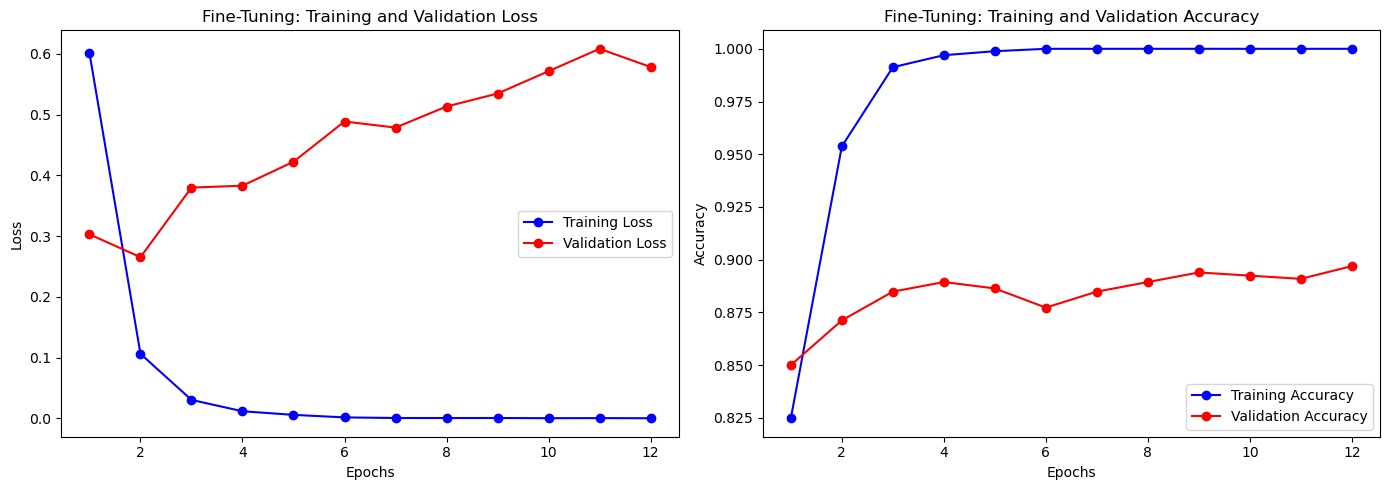

In [33]:
# Plot training and validation loss and accuracy for fine-tuning
train_loss_ft = history_fine_tune.history['loss']
val_loss_ft = history_fine_tune.history['val_loss']
train_accuracy_ft = history_fine_tune.history['accuracy']
val_accuracy_ft = history_fine_tune.history['val_accuracy']
epochs_ft = range(1, len(train_loss_ft) + 1)

# Plotting Loss and Accuracy Curves
plt.figure(figsize=(14, 5))

# Subplot 1: Training and validation loss for fine-tuning
plt.subplot(1, 2, 1)
plt.plot(epochs_ft, train_loss_ft, 'bo-', label='Training Loss')
plt.plot(epochs_ft, val_loss_ft, 'ro-', label='Validation Loss')
plt.title('Fine-Tuning: Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Subplot 2: Training and validation accuracy for fine-tuning
plt.subplot(1, 2, 2)
plt.plot(epochs_ft, train_accuracy_ft, 'bo-', label='Training Accuracy')
plt.plot(epochs_ft, val_accuracy_ft, 'ro-', label='Validation Accuracy')
plt.title('Fine-Tuning: Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()